# Random Data Simulation and Fitting Isotopomer Distribution Using Neural Network

Addtion of neural network to fit isotopomer distribution. We will complete this with the following workflow: 
- Create simple nn to take the place of the basic fit within the isotopomer class.
- Expand this to handle multiple samples, adding functions to generate distributions and sim data for different samples.
- Train and tune the network and add overfitting prevention measures.
- Generalise the network to handle different metabolites.
- Use our networks to fit to real HSQC and GCMS data

Import necessary packages:

In [1]:
import numpy as np
import pandas as pd
from metabolabpytools import isotopomerAnalysis

Create an isotopomerAnalysis object:

In [2]:
ia = isotopomerAnalysis.IsotopomerAnalysis()

Define metabolite parameters:

In [3]:
# Ensure isotopomers is correctly initialized
isotopomers = [
    [0, 0, 0],  # Unlabelled
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
]

num_samples = 1000
hsqc = [0, 1, 1]
metabolite = 'L-LacticAcid'


In [4]:
ia.init_metabolite_multiple_samples(metabolite, hsqc, num_samples=num_samples)

Initialising and set isoptomer, HSQC and gcms data for multiple samples:

In [5]:
generated_percentages = []
for exp_index in range(num_samples):
    random_percentages = ia.generate_isotopomer_percentages()  # Generate new random percentages for each sample
    generated_percentages.append(random_percentages)  # Store generated percentages for comparison
    
    ia.set_fit_isotopomers_simple(metabolite=metabolite, isotopomers=isotopomers, percentages=random_percentages, exp_index=exp_index)
    ia.sim_hsqc_data(metabolite=metabolite, exp_index=exp_index, isotopomers=isotopomers, percentages=random_percentages)
    ia.sim_gcms_data(metabolite, exp_index)

TypeError: IsotopomerAnalysis.generate_isotopomer_percentages() missing 1 required positional argument: 'metabolite_type'

Add noise to HSQC and GC-MS data:

In [ ]:
ia.add_noise_to_hsqc_gcms(metabolite, num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)

Modify object states for the data:

In [ ]:
ia.use_hsqc_multiplet_data = True
ia.use_gcms_data = True
ia.use_nmr1d_data = False

Fitting the neural network:

In [ ]:
ia.fit_data_nn(metabolite=metabolite, fit_isotopomers=isotopomers, percentages=generated_percentages, num_samples=num_samples)

## Addressing Overfitting: 

To prevent overfitting in my neural network model for predicting isotopomer distributions, several strategies have been implemented:

- First, use of a validation set to monitor the model's performance during training, ensuring it maintains its ability to generalize to unseen data has been used. This involves splitting the data into training and validation sets and using early stopping to halt training when the validation loss stops improving, which helps avoid overfitting by preventing the model from learning noise in the training data. 
 
- Additionally, dropout layers have been employed within the neural network architecture. Dropout randomly deactivates a fraction of neurons during each training step, which forces the network to learn more robust features and reduces reliance on any specific neurons. 

- Regularization techniques, such as L2 regularization, have been used to penalize large weights, discouraging the model from becoming too complex. 

- Finally, the model has been trained with an adequate amount of data (1000 samples), enhancing the model's ability to generalize.

## Generalising for other metabolites:

In [1]:
import numpy as np
import pandas as pd
from metabolabpytools import isotopomerAnalysis

ia = isotopomerAnalysis.IsotopomerAnalysis()

# Define isotopomers for different metabolites
isotopomers_three_carbon = [
    [0, 0, 0],  # Unlabelled
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
]

isotopomers_aspartate = [
    [0, 0, 0, 0],  # Unlabelled
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [1, 1, 0, 0],
    [1, 0, 1, 0],
    [1, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 1],
    [1, 1, 1, 0],
    [1, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 1, 1, 1],
    [1, 1, 1, 1]
]

num_samples = 1000
hsqc_three_carbon = [[1, 1, 1], [0, 1, 1]]
hsqc_aspartate = [
    [0, 1, 1, 0], 
    [1, 1, 1, 0], 
    [0, 1, 1, 1], 
    [1, 1, 1, 1]
]

# Initialize the metabolites with multiple samples
ia.init_metabolite_multiple_samples(metabolites=['three-carbon', 'aspartate'], hsqc=hsqc_three_carbon, num_samples=num_samples)

# Generate and set isotopomers for three-carbon metabolite
for hsqc in hsqc_three_carbon:
    generated_percentages = []
    for exp_index in range(num_samples):
        random_percentages = ia.generate_isotopomer_percentages('three-carbon')
        generated_percentages.append(random_percentages)
        
        ia.set_fit_isotopomers_simple(metabolite='three-carbon', isotopomers=isotopomers_three_carbon, percentages=random_percentages, exp_index=exp_index)
        ia.sim_hsqc_data(metabolite='three-carbon', exp_index=exp_index, isotopomers=isotopomers_three_carbon, percentages=random_percentages)
        ia.sim_gcms_data('three-carbon', exp_index)

    ia.add_noise_to_hsqc_gcms('three-carbon', num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)
    ia.fit_data_nn(metabolite='three-carbon', fit_isotopomers=isotopomers_three_carbon, percentages=generated_percentages, num_samples=num_samples, hsqc=hsqc, tuner_project_name=f'three_carbon_{hsqc}')

# Generate and set isotopomers for aspartate
for hsqc in hsqc_aspartate:
    generated_percentages = []
    for exp_index in range(num_samples):
        random_percentages = ia.generate_isotopomer_percentages('aspartate')
        generated_percentages.append(random_percentages)
        
        ia.set_fit_isotopomers_simple(metabolite='aspartate', isotopomers=isotopomers_aspartate, percentages=random_percentages, exp_index=exp_index)
        ia.sim_hsqc_data(metabolite='aspartate', exp_index=exp_index, isotopomers=isotopomers_aspartate, percentages=random_percentages)
        ia.sim_gcms_data('aspartate', exp_index)

    ia.add_noise_to_hsqc_gcms('aspartate', num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)
    ia.fit_data_nn(metabolite='aspartate', fit_isotopomers=isotopomers_aspartate, percentages=generated_percentages, num_samples=num_samples, hsqc=hsqc, tuner_project_name=f'aspartate_{hsqc}')

# Save results to an Excel file
ia.save_results('results.xlsx')


C:\Users\raath\metabolabpytools\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)




Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
0.009             |0.009             |l2_lambda
0.086             |0.086             |learning_rate
256               |256               |num_neurons
4                 |4                 |num_layers
0                 |0                 |dropout_rate

Epoch 1/100


KeyboardInterrupt: 

So let's generalize using hsqc vector length and adding 5 and 6 carbon:

In [1]:
import numpy as np
import pandas as pd
from metabolabpytools import isotopomerAnalysis

ia = isotopomerAnalysis.IsotopomerAnalysis()

# Define isotopomers for different metabolites
isotopomers_three_carbon = [
    [0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1],
    [1, 1, 0], [1, 0, 1], [0, 1, 1], [1, 1, 1]
]

isotopomers_four_carbon = [
    [0, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0],
    [0, 0, 0, 1], [1, 1, 0, 0], [1, 0, 1, 0], [1, 0, 0, 1],
    [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 1, 1], [1, 1, 1, 0],
    [1, 1, 0, 1], [1, 0, 1, 1], [0, 1, 1, 1], [1, 1, 1, 1]
]

isotopomers_five_carbon = [
    [0, 0, 0, 0, 0], [1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [1, 1, 0, 0, 0], [1, 0, 1, 0, 0],
    [1, 0, 0, 1, 0], [1, 0, 0, 0, 1], [0, 1, 1, 0, 0], [0, 1, 0, 1, 0],
    [0, 1, 0, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 0, 1], [0, 0, 0, 1, 1],
    [1, 1, 1, 0, 0], [1, 1, 0, 1, 0], [1, 1, 0, 0, 1], [1, 0, 1, 1, 0],
    [1, 0, 1, 0, 1], [1, 0, 0, 1, 1], [0, 1, 1, 1, 0], [0, 1, 1, 0, 1],
    [0, 1, 0, 1, 1], [0, 0, 1, 1, 1], [1, 1, 1, 1, 0], [1, 1, 1, 0, 1],
    [1, 1, 0, 1, 1], [1, 0, 1, 1, 1], [0, 1, 1, 1, 1], [1, 1, 1, 1, 1]
]

isotopomers_six_carbon = [
    [0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1], [1, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0], [0, 1, 0, 0, 1, 0], [0, 1, 0, 0, 0, 1],
    [0, 0, 1, 1, 0, 0], [0, 0, 1, 0, 1, 0], [0, 0, 1, 0, 0, 1], [0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 1, 1], [1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0],
    [1, 1, 0, 0, 1, 0], [1, 1, 0, 0, 0, 1], [1, 0, 1, 1, 0, 0], [1, 0, 1, 0, 1, 0],
    [1, 0, 1, 0, 0, 1], [1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 0, 1], [1, 0, 0, 0, 1, 1],
    [0, 1, 1, 1, 0, 0], [0, 1, 1, 0, 1, 0], [0, 1, 1, 0, 0, 1], [0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 1], [0, 1, 0, 0, 1, 1], [0, 0, 1, 1, 1, 0], [0, 0, 1, 1, 0, 1],
    [0, 0, 1, 0, 1, 1], [0, 0, 0, 1, 1, 1], [1, 1, 1, 1, 0, 0], [1, 1, 1, 0, 1, 0],
    [1, 1, 1, 0, 0, 1], [1, 1, 0, 1, 1, 0], [1, 1, 0, 1, 0, 1], [1, 1, 0, 0, 1, 1],
    [1, 0, 1, 1, 1, 0], [1, 0, 1, 1, 0, 1], [1, 0, 1, 0, 1, 1], [1, 0, 0, 1, 1, 1],
    [0, 1, 1, 1, 1, 0], [0, 1, 1, 1, 0, 1], [0, 1, 1, 0, 1, 1], [0, 1, 0, 1, 1, 1],
    [0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 0, 1], [1, 1, 1, 0, 1, 1],
    [1, 1, 0, 1, 1, 1], [1, 0, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]
]


num_samples = 1000
hsqc_three_carbon = [[1, 1, 1]]
  #  [0, 1, 1], [0, 0, 1]]
hsqc_four_carbon = [
    [0, 1, 1, 0], 
    #[1, 1, 1, 0], 
    #[0, 1, 1, 1], 
    #[1, 1, 1, 1]
]
hsqc_five_carbon = [
    [0, 1, 1, 1, 0],
    #[1, 1, 1, 1, 0],
    #[0, 1, 1, 1, 1],
    #[1, 1, 1, 1, 1]
]
hsqc_six_carbon = [
    [1, 1, 1, 1, 1, 1]
]

# Initialize the metabolites with multiple samples
ia.init_metabolite_multiple_samples(metabolites=['three-carbon', 'four_carbon', 'five_carbon', 'six_carbon'], hsqc=hsqc_three_carbon, num_samples=num_samples)


In [2]:
# Generate and set isotopomers for three-carbon metabolite
for hsqc in hsqc_three_carbon:
    generated_percentages = []
    for exp_index in range(num_samples):
        random_percentages = ia.generate_isotopomer_percentages('three-carbon')
        generated_percentages.append(random_percentages)
        
        ia.set_fit_isotopomers_simple(metabolite='three-carbon', isotopomers=isotopomers_three_carbon, percentages=random_percentages, exp_index=exp_index)
        ia.sim_hsqc_data(metabolite='three-carbon', exp_index=exp_index, isotopomers=isotopomers_three_carbon, percentages=random_percentages)
        ia.sim_gcms_data('three-carbon', exp_index)

    ia.add_noise_to_hsqc_gcms('three-carbon', num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)
    ia.fit_data_nn(metabolite='three-carbon', fit_isotopomers=isotopomers_three_carbon, percentages=generated_percentages, num_samples=num_samples, hsqc=hsqc, tuner_project_name=f'three_carbon_{hsqc}')

ia.save_results('results_three_carbon.xlsx')

[] [69.00996662031103, 30.988375531562344]
First X_train data sample: [[69.00996662 30.98837553]]
First y_train data sample: [[69.05462196  0.         30.94537804  0.          0.          0.
   0.          0.        ]]
[] [29.53385256472737, 61.893500537128915]
[] [69.23165316956914, 23.004396045047173]
[] [51.04545293642435, 19.88751858986068]
[] [73.67425913242342, 13.064354414822894]
[] [57.5780449244539, 0.0032055068713582346]
[] [40.26827036443158, -0.017073582580522585]
[] [37.48384351954185, 27.42575356600142]
[] [67.76278545817102, 16.42200911707968]
[] [28.734121156453117, 71.31268922327992]
[] [67.36565306603137, 21.99187198269237]
[] [54.79821064145503, 31.67090249046085]
[] [71.47080214374468, 11.23801089854006]
[] [32.05459186111507, 14.562249134325638]
[] [31.448414066193422, 36.44884797282781]
[] [60.95930060698824, 32.74722013455635]
[] [57.69064704876251, 21.185904570746146]
[] [49.91939866613806, 11.337564749222318]
[] [25.23806349738459, 22.06011591581587]
[] [50.849

KeyboardInterrupt: 

In [3]:
# Generate and set isotopomers four carbon
for hsqc in hsqc_four_carbon:
    generated_percentages = []
    for exp_index in range(num_samples):
        random_percentages = ia.generate_isotopomer_percentages('four_carbon')
        generated_percentages.append(random_percentages)
        
        ia.set_fit_isotopomers_simple(metabolite='four_carbon', isotopomers=isotopomers_four_carbon, percentages=random_percentages, exp_index=exp_index)
        ia.sim_hsqc_data(metabolite='four_carbon', exp_index=exp_index, isotopomers=isotopomers_four_carbon, percentages=random_percentages)
        ia.sim_gcms_data('four_carbon', exp_index)

    ia.add_noise_to_hsqc_gcms('four_carbon', num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)
    ia.fit_data_nn(metabolite='four_carbon', fit_isotopomers=isotopomers_four_carbon, percentages=generated_percentages, num_samples=num_samples, hsqc=hsqc, tuner_project_name=f'four_carbon_{hsqc}')

ia.save_results('results_four_carbon.xlsx')

Trial 5 Complete [00h 00m 07s]
val_loss: 23.30263900756836

Best val_loss So Far: 20.604331970214844
Total elapsed time: 00h 00m 45s
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 164.1600 - val_loss: 108.0900
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98.0182 - val_loss: 84.8074
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.1821 - val_loss: 51.2480
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.1921 - val_loss: 47.9366
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.3008 - val_loss: 36.6264
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.2293 - val_loss: 34.6019
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.9972 - val_loss: 30.6816
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.3474 - val_loss: 29.2069
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.3717 - val_loss: 27.8956
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.3490 - val_loss: 28

In [4]:
for hsqc in hsqc_five_carbon:
    generated_percentages = []
    for exp_index in range(num_samples):
        random_percentages = ia.generate_isotopomer_percentages('five_carbon')
        generated_percentages.append(random_percentages)
        
        ia.set_fit_isotopomers_simple(metabolite='five_carbon', isotopomers=isotopomers_five_carbon, percentages=random_percentages, exp_index=exp_index)
        ia.sim_hsqc_data(metabolite='five_carbon', exp_index=exp_index, isotopomers=isotopomers_five_carbon, percentages=random_percentages)
        ia.sim_gcms_data('five_carbon', exp_index)

    ia.add_noise_to_hsqc_gcms('five_carbon', num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)
    ia.fit_data_nn(metabolite='five_carbon', fit_isotopomers=isotopomers_five_carbon, percentages=generated_percentages, num_samples=num_samples, hsqc=hsqc, tuner_project_name=f'five_carbon_{hsqc}')

ia.save_results('results_five_carbon.xlsx')

Trial 5 Complete [00h 00m 09s]
val_loss: 6.943232536315918

Best val_loss So Far: 5.903037071228027
Total elapsed time: 00h 00m 45s
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 58.8681 - val_loss: 21.1781
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.2391 - val_loss: 13.8425
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.2393 - val_loss: 11.8465
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.9883 - val_loss: 10.5226
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.1651 - val_loss: 9.2202
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4944 - val_loss: 13.3351
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.3017 - val_loss: 9.5338
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3741 - val_loss: 9.0443
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0890 - val_loss: 8.0678
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9208 - val_loss: 7.3016
Epoch 

In [ ]:
for hsqc in hsqc_six_carbon:
    generated_percentages = []
    for exp_index in range(num_samples):
        random_percentages = ia.generate_isotopomer_percentages('six_carbon')
        generated_percentages.append(random_percentages)
        
        ia.set_fit_isotopomers_simple(metabolite='six_carbon', isotopomers=isotopomers_six_carbon, percentages=random_percentages, exp_index=exp_index)
        ia.sim_hsqc_data(metabolite='six_carbon', exp_index=exp_index, isotopomers=isotopomers_six_carbon, percentages=random_percentages)
        ia.sim_gcms_data('six_carbon', exp_index)

    ia.add_noise_to_hsqc_gcms('six_carbon', num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)
    ia.fit_data_nn(metabolite='six_carbon', fit_isotopomers=isotopomers_six_carbon, percentages=generated_percentages, num_samples=num_samples, hsqc=hsqc, tuner_project_name=f'six_carbon_{hsqc}')

# Save results to an Excel file
ia.save_results('results_six_carbon.xlsx')

## Glutamate and Glutamine, Special case:

In [1]:
import numpy as np
import pandas as pd
from metabolabpytools import isotopomerAnalysis

ia = isotopomerAnalysis.IsotopomerAnalysis()

# Define isotopomers for different metabolites
isotopomers_five_carbon_special = [
    [0, 0, 0, 0, 0],  # Unlabelled
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0],
    [1, 0, 0, 1, 0],
    [1, 0, 0, 0, 1],
    [0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 0, 1],
    [0, 0, 1, 1, 0],
    [0, 0, 1, 0, 1],
    [0, 0, 0, 1, 1],
    [1, 1, 1, 0, 0],
    [1, 1, 0, 1, 0],
    [1, 1, 0, 0, 1],
    [1, 0, 1, 1, 0],
    [1, 0, 1, 0, 1],
    [1, 0, 0, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 0, 1],
    [0, 1, 0, 1, 1],
    [0, 0, 1, 1, 1],
    [1, 1, 1, 1, 0],
    [1, 1, 1, 0, 1],
    [1, 1, 0, 1, 1],
    [1, 0, 1, 1, 1],
    [0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
]

num_samples = 1000
hsqc_five_carbon_special = [[0, 1, 1, 1, 0]]

# Initialize the metabolites with multiple samples
ia.init_metabolite_multiple_samples(metabolites=['five-carbon-special'], hsqc=hsqc_five_carbon_special, num_samples=num_samples)

# Generate and set isotopomers for five-carbon special case
for hsqc in hsqc_five_carbon_special:
    generated_percentages = []
    for exp_index in range(num_samples):
        random_percentages = ia.generate_isotopomer_percentages('five_carbon')
        generated_percentages.append(random_percentages)
        
        ia.set_fit_isotopomers_simple(metabolite='five-carbon-special', isotopomers=isotopomers_five_carbon_special, percentages=random_percentages, exp_index=exp_index)
        ia.sim_hsqc_data_special_case(metabolite='five-carbon-special', exp_index=exp_index, isotopomers=isotopomers_five_carbon_special, percentages=random_percentages)
        ia.sim_gcms_data('five-carbon-special', exp_index)

    ia.add_noise_to_hsqc_gcms('five-carbon-special', num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)
    ia.fit_data_nn(metabolite='five-carbon-special', fit_isotopomers=isotopomers_five_carbon_special, percentages=generated_percentages, num_samples=num_samples, hsqc=hsqc, tuner_project_name=f'five_carbon_special_{hsqc}')

# Save results to an Excel file
ia.save_results('results_special_case.xlsx')


Trial 10 Complete [00h 00m 09s]
val_loss: 7.999727725982666

Best val_loss So Far: 5.2565813064575195
Total elapsed time: 00h 01m 26s
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 104.9087 - val_loss: 87.9540
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 80.3810 - val_loss: 57.0953
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.5917 - val_loss: 43.3569
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.2269 - val_loss: 35.8995
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.0436 - val_loss: 30.0872
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.3697 - val_loss: 35.2768
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.6483 - val_loss: 22.1540
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.0083 - val_loss: 17.9851
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.6433 - val_loss: 22.0756
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.6275 - val_loss: 11

## Plotting figure:

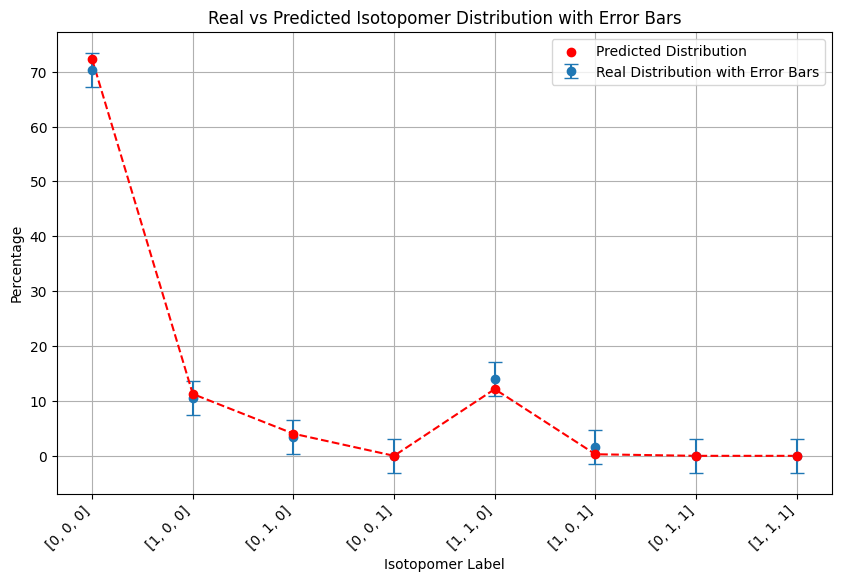

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data
true_distribution = np.array([70.33597867, 10.6144484, 3.47637436, 0.0, 13.96382585, 1.60937272, 0.0, 0.0])
predicted_distribution = np.array([72.24472, 11.2743104, 4.034303, 0.0, 12.1608775, 0.2857926, 0.0, 0.0])
error_percentage = 3.1  # 3.1%

# Error bars
errors = error_percentage

x_labels = [
    "[0, 0, 0]",
    "[1, 0, 0]",
    "[0, 1, 0]",
    "[0, 0, 1]",
    "[1, 1, 0]",
    "[1, 0, 1]",
    "[0, 1, 1]",
    "[1, 1, 1]"
]

# Plot
x = np.arange(len(true_distribution))

plt.figure(figsize=(10, 6))
plt.errorbar(x, true_distribution, yerr=errors, fmt='o', label='Real Distribution with Error Bars', capsize=5)
plt.scatter(x, predicted_distribution, color='red', label='Predicted Distribution', zorder=5)
plt.plot(x, predicted_distribution, color='red', linestyle='dashed')

plt.xlabel('Isotopomer Label')
plt.ylabel('Percentage')
plt.title('Real vs Predicted Isotopomer Distribution with Error Bars')
plt.legend()
plt.grid(True)
plt.xticks(ticks=x, labels=x_labels, rotation=45, ha='right')
plt.show()
